In [1]:
import numpy as np
from google.colab.patches import cv2_imshow
import cv2
import gdown

In [4]:
url = 'https://drive.google.com/drive/folders/1autfP6l9Gbq_eEf-AibsHzJ_Olih_Ewd'
gdown.download_folder(url)

Retrieving folder contents


Processing file 1X78_4B8A6Z4aN-qpsEaA_RLvkNfwoIrQ GreenBackground.png
Processing file 1Gv-H6SVaYK8XDs3RPlOS_Rq0a8cZkA8w NewBackground.jpg
Processing file 1RnBB-dsB3b77rCdOcaPdqpBOVJ_P3h07 Object.png


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1X78_4B8A6Z4aN-qpsEaA_RLvkNfwoIrQ
To: /content/Image data/GreenBackground.png
100%|██████████| 5.51k/5.51k [00:00<00:00, 11.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Gv-H6SVaYK8XDs3RPlOS_Rq0a8cZkA8w
To: /content/Image data/NewBackground.jpg
100%|██████████| 64.3k/64.3k [00:00<00:00, 38.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1RnBB-dsB3b77rCdOcaPdqpBOVJ_P3h07
To: /content/Image data/Object.png
100%|██████████| 51.0k/51.0k [00:00<00:00, 55.0MB/s]
Download completed


['/content/Image data/GreenBackground.png',
 '/content/Image data/NewBackground.jpg',
 '/content/Image data/Object.png']

In [58]:
bg1_image = cv2.imread('/content/Image data/GreenBackground.png', 1)
bg1_image = cv2.resize(bg1_image, (678 , 381))

ob_image = cv2.imread('/content/Image data/Object.png', 1)
ob_image = cv2.resize(ob_image, (678 , 381))

bg2_image = cv2.imread('/content/Image data/NewBackground.jpg', 1)
bg2_image = cv2.resize(bg2_image, (678 , 381))

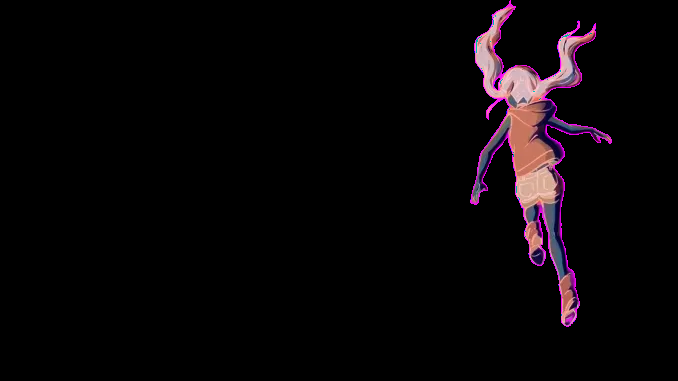

In [68]:
def compute_difference(bg_img, input_img):
  result = abs(bg_img - input_img)
  return result

difference_single_channel = compute_difference(bg1_image ,ob_image )
cv2_imshow(difference_single_channel)


In [69]:
def compute_binary_mask(difference_single_channel):
  result = np.ones(difference_single_channel.shape[0:2])
  result = np.where(difference_single_channel > 5, 255, 0)
  return result


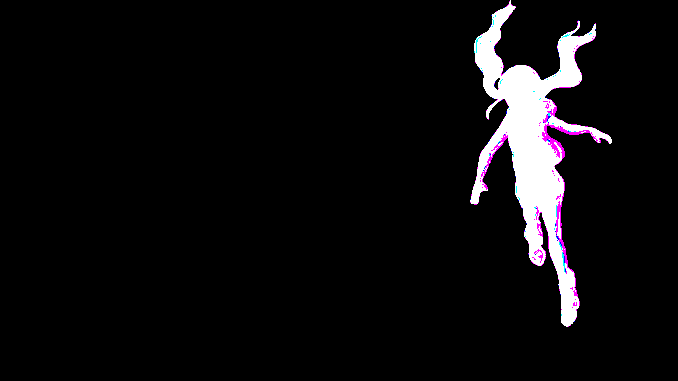

(381, 678, 3)

In [70]:
binary_mask = compute_binary_mask(difference_single_channel)
cv2_imshow(binary_mask)
binary_mask.shape

In [71]:
def replace_background(bg1_image ,bg2_image ,ob_image ):
  output = np.zeros(bg1_image.shape)
  difference_single_channel = compute_difference(bg1_image ,ob_image)
  binary_mask = compute_binary_mask(difference_single_channel)
  output = np.where(binary_mask == 255, ob_image, bg2_image)
  return output

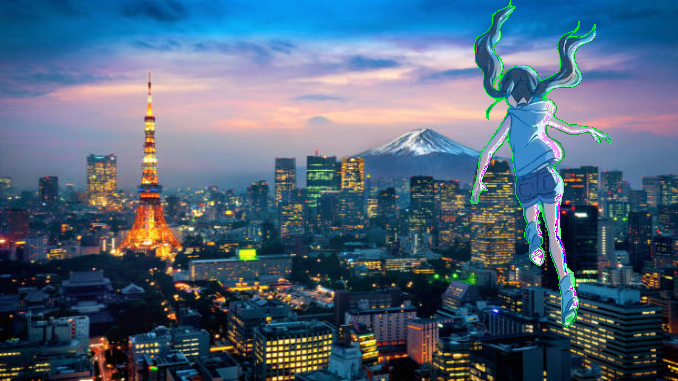

In [72]:
result = replace_background(bg1_image ,bg2_image ,ob_image )
cv2_imshow(result)